In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
x0=np.array([0,0]).reshape(2,1)
epsilon=1e-8
tot_times=50

def f(x):
    #caculate f(x)
    func=np.power(np.e,x[0]+3*x[1]-0.1)+np.power(np.e,x[0]-3*x[1]-0.1)+np.power(np.e,-x[0]-0.1)
    return func

def nable_f(x):
    #caculate nable_f(x)
    func=np.array([np.power(np.e,x[0]+3*x[1]-0.1)+np.power(np.e,x[0]-3*x[1]-0.1)-np.power(np.e,-x[0]-0.1),
                  3*np.power(np.e,x[0]+3*x[1]-0.1)-3*np.power(np.e,x[0]-3*x[1]-0.1)]).reshape(2,1)
    return func

def nable2_f(x):
    func=np.array([[np.power(np.e,x[0]+3*x[1]-0.1)+np.power(np.e,x[0]-3*x[1]-0.1)+np.power(np.e,-x[0]-0.1),
                   3*np.power(np.e,x[0]+3*x[1]-0.1)-3*np.power(np.e,x[0]-3*x[1]-0.1)],
                  [3*np.power(np.e,x[0]+3*x[1]-0.1)-3*np.power(np.e,x[0]-3*x[1]-0.1),
                  9*np.power(np.e,x[0]+3*x[1]-0.1)+9*np.power(np.e,x[0]-3*x[1]-0.1)]]).reshape(2,2)
    return func

def d_nt(x):
    #caculate the newton decent direction
    d=-np.dot(np.linalg.inv(nable2_f(x)),nable_f(x))
    return d

def lam2(x):
    func=-np.dot(np.transpose(nable_f(x)),d_nt(x))
    return func

def judge(x,arr):
    #save each error of epoch
    #if it is less or equal epsilon, then return false, else return true
    l=0.5*lam2(x)
    arr.append(l)
    if l > epsilon and len(arr)<tot_times:
        return True
    return False

def good_x(a,b):
    x=x0
    error=[]
    k=0
    while judge(x,error):
        direction=d_nt(x)
        t=3
        while f(x+t*direction)> f(x)-a*t*lam2(x):
            t=b*t
        x=x+t*direction
        k=k+1
    
    return x,k,error

In [80]:
# change alpha, fix beta=0.7
alpha_11=np.linspace(0.01,0.49,10)
beta_11=0.7
x_list11=[]
k_list11=[]
error_list11=[]
for a in alpha_11:
    x,k,error=good_x(a,beta_11)
    error=list(error)
    while len(error)<20:
        error.append(error[-1])
    error=np.array(error)
    x_list11.append(x)
    k_list11.append(k)
    error_list11.append(error)
    print(k)
x_list11=np.array(x_list11).reshape(10,-1)
error_list11=np.array(error_list11).reshape(10,-1)

11
11
11
11
11
4
3
3
3
4


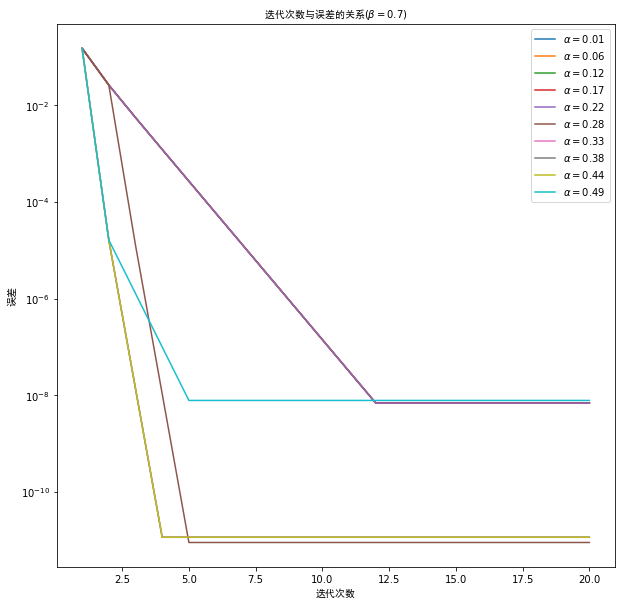

In [95]:
k=np.arange(1,20+1)
plt.rcParams['figure.figsize']=(10,10)
plt.plot(k,error_list11[0],label=r"$\alpha=$"+str(round(alpha_11[0],2)))
plt.plot(k,error_list11[1],label=r"$\alpha=$"+str(round(alpha_11[1],2)))
plt.plot(k,error_list11[2],label=r"$\alpha=$"+str(round(alpha_11[2],2)))
plt.plot(k,error_list11[3],label=r"$\alpha=$"+str(round(alpha_11[3],2)))
plt.plot(k,error_list11[4],label=r"$\alpha=$"+str(round(alpha_11[4],2)))
plt.plot(k,error_list11[5],label=r"$\alpha=$"+str(round(alpha_11[5],2)))
plt.plot(k,error_list11[6],label=r"$\alpha=$"+str(round(alpha_11[6],2)))
plt.plot(k,error_list11[7],label=r"$\alpha=$"+str(round(alpha_11[7],2)))
plt.plot(k,error_list11[8],label=r"$\alpha=$"+str(round(alpha_11[8],2)))
plt.plot(k,error_list11[9],label=r"$\alpha=$"+str(round(alpha_11[9],2)))
plt.xlabel('迭代次数',fontproperties='simhei')
plt.ylabel('误差',fontproperties='simhei')
plt.title('迭代次数与误差的关系'+r"$(\beta=0.7)$",fontproperties='simhei')
plt.yscale('log')
plt.legend()
plt.show()

In [98]:
# change alpha, fix beta=0.7
alpha_12=0.1
beta_12=np.linspace(0.01,0.99,10)
x_list12=[]
k_list12=[]
error_list12=[]
for b in beta_12:
    x,k,error=good_x(alpha_12,b)
    error=list(error)
    while len(error)<50:
        error.append(error[-1])
    error=np.array(error)
    x_list12.append(x)
    k_list12.append(k)
    error_list12.append(error)
    print(k)
x_list12=np.array(x_list12).reshape(10,-1)
error_list12=np.array(error_list12).reshape(10,-1)


49
19
8
3
8
20
8
35
19
37


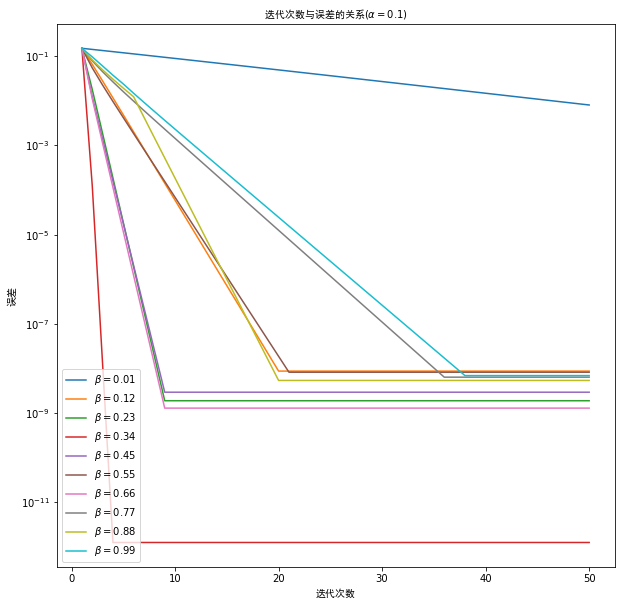

In [99]:
k=np.arange(1,tot_times+1)
plt.rcParams['figure.figsize']=(10,10)
plt.plot(k,error_list12[0],label=r"$\beta=$"+str(round(beta_12[0],2)))
plt.plot(k,error_list12[1],label=r"$\beta=$"+str(round(beta_12[1],2)))
plt.plot(k,error_list12[2],label=r"$\beta=$"+str(round(beta_12[2],2)))
plt.plot(k,error_list12[3],label=r"$\beta=$"+str(round(beta_12[3],2)))
plt.plot(k,error_list12[4],label=r"$\beta=$"+str(round(beta_12[4],2)))
plt.plot(k,error_list12[5],label=r"$\beta=$"+str(round(beta_12[5],2)))
plt.plot(k,error_list12[6],label=r"$\beta=$"+str(round(beta_12[6],2)))
plt.plot(k,error_list12[7],label=r"$\beta=$"+str(round(beta_12[7],2)))
plt.plot(k,error_list12[8],label=r"$\beta=$"+str(round(beta_12[8],2)))
plt.plot(k,error_list12[9],label=r"$\beta=$"+str(round(beta_12[9],2)))
plt.xlabel('迭代次数',fontproperties='simhei')
plt.ylabel('误差',fontproperties='simhei')
plt.title('迭代次数与误差的关系'+r"$(\alpha=0.1)$",fontproperties='simhei')
plt.yscale('log')
plt.legend()
plt.show()